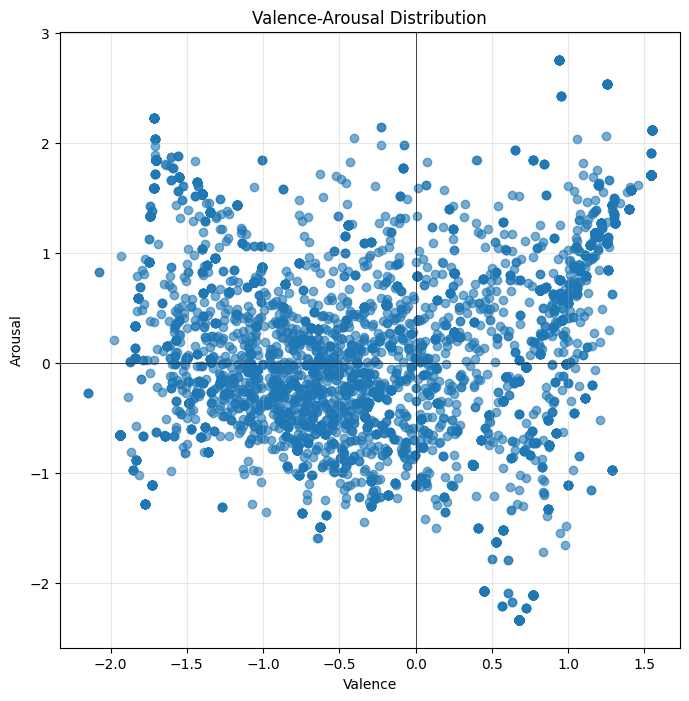

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Your training data
datafile = pd.read_csv("data/deezer_mdd/train.csv")
valence = datafile['valence'].values
arousal = datafile['arousal'].values

plt.figure(figsize=(8, 8))
plt.scatter(valence, arousal, alpha=0.6)
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.title('Valence-Arousal Distribution')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.show()